In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib
data_dir = "/content/drive/MyDrive/Train/"
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

5198


In [4]:
labels = os.listdir('/content/drive/MyDrive/Train/')
labels.sort()
labels

['astilbe',
 'bellflower',
 'black-eyed susan',
 'calendula',
 'california poppy',
 'tulip']

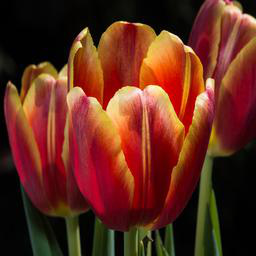

In [ ]:
tulip = list(data_dir.glob('tulip/*'))
PIL.Image.open(str(tulip[0]))

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

# lay ra 95% anh de train

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print(train_ds)

Found 5198 files belonging to 6 classes.
Using 4159 files for training.
<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
batch_size = 32
img_height = 256
img_width = 256

# lay ra 5% anh de test

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5198 files belonging to 6 classes.
Using 1039 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['astilbe', 'bellflower', 'black-eyed susan', 'calendula', 'california poppy', 'tulip']


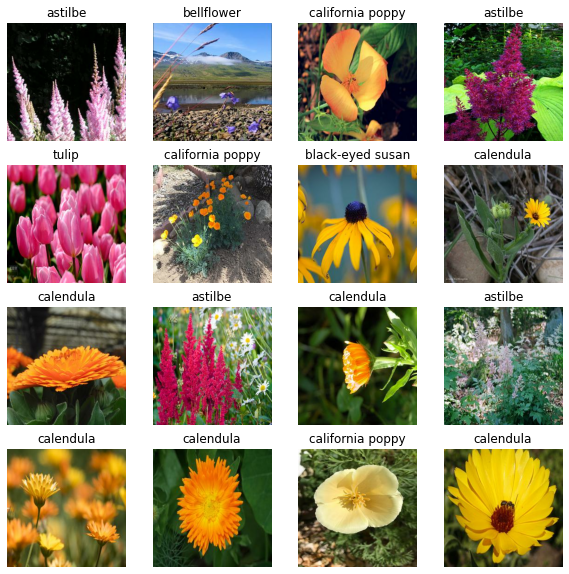

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
num_classes = 6

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),

  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),

  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),

  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


130/130 [==============================] - 690s 5s/step - loss: 1.3292 - accuracy: 0.4388 - val_loss: 0.9910 - val_accuracy: 0.5919
Epoch 2/5
130/130 [==============================] - 15s 113ms/step - loss: 0.8689 - accuracy: 0.6461 - val_loss: 0.8516 - val_accuracy: 0.6612
Epoch 3/5
130/130 [==============================] - 15s 112ms/step - loss: 0.7052 - accuracy: 0.7177 - val_loss: 0.8021 - val_accuracy: 0.6833
Epoch 4/5
130/130 [==============================] - 15s 113ms/step - loss: 0.5428 - accuracy: 0.7935 - val_loss: 0.7600 - val_accuracy: 0.7151
Epoch 5/5
130/130 [==============================] - 15s 113ms/step - loss: 0.4122 - accuracy: 0.8512 - val_loss: 0.8078 - val_accuracy: 0.7170


In [5]:
model.save('/content/drive/MyDrive/lastModel')


NameError: ignored

In [6]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/lastModel')

In [8]:
import os
import cv2
path = "/content/drive/MyDrive/testtesta"
FJoin = os.path.join
files = [FJoin(path, f) for f in os.listdir(path)]
files

for x in files:
  test = cv2.imread(x)
  img = cv2.resize(test, (256, 256))
  img = np.array([img])
  choose = model.predict(img).argmax(axis= -1)
  print('Bức ảnh trên là:', x , ':', labels[choose[0]], choose)

Bức ảnh trên là: /content/drive/MyDrive/testtesta/california poppy1 (2) - Copy.jpg : bellflower [1]
Bức ảnh trên là: /content/drive/MyDrive/testtesta/california poppy1 (1).jpg : california poppy [4]
Bức ảnh trên là: /content/drive/MyDrive/testtesta/california poppy1 (1) - Copy.jpg : california poppy [4]
Bức ảnh trên là: /content/drive/MyDrive/testtesta/calendula1 (4).jpg : bellflower [1]
Bức ảnh trên là: /content/drive/MyDrive/testtesta/calendula1 (5).jpg : bellflower [1]
Bức ảnh trên là: /content/drive/MyDrive/testtesta/calendula1 (3).jpg : bellflower [1]
Bức ảnh trên là: /content/drive/MyDrive/testtesta/calendula1 (2).jpg : bellflower [1]
Bức ảnh trên là: /content/drive/MyDrive/testtesta/black-eyed susan5.jpg : bellflower [1]
Bức ảnh trên là: /content/drive/MyDrive/testtesta/black-eyed susan4.jpg : bellflower [1]
Bức ảnh trên là: /content/drive/MyDrive/testtesta/calendula1 (1).jpg : bellflower [1]
Bức ảnh trên là: /content/drive/MyDrive/testtesta/black-eyed susan3.jpg : bellflower [1

In [ ]:
import sys
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
